<h1><a href="www.kaggle.com/devinanzelmo/dota-2-matches">DotA2 Matches dataset</a></h1>

<h2>Описание</h2>
<p>Набор содержит 50000 тысяч матчей ранговых игр. Этот датасет предназначет для оценки поведения игроков, их уровня игры, продолжительности игр, сражений и т.д.</p>
<p>Данные из этого датасета могут использоваться для анализа актуальности выбора определенных героев и предметов, общей модели поведения игроков и девиаций из нее и многого другого. Эти данные полезны, например, при разработке новых обновлений для игры, усовершенствования систем матчмейкинга или наказаний за несоответствующее поведение игроков и прочее.</p>

<div style="padding-left: 2em;">
    <h3>Уточнение для данного задания</h3>
    <p>Для анализа в этом задании выбрана часть датасета с данными по игрокам и героям, на которых они играли конкретный матч. Так как атрибутов получается достаточно много, здесь мы опишем лишь некоторые из них в качестве примера.</p>
</div>

In [1]:
import numpy as np
import pandas as pd

<div style="border: #000000 1px solid; border-radius: 5px; padding: 1em;">
    <h2>Описание выбранных для анализа атрибутов</h2>
    <ul>
        <li>
            <h4>match_id - Номер матча</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Интервальная</td>
                    <td>[0; 499999]</td>
                    <td>17350</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>player_slot - Номер места игрока в матче. От 0 до 4 - команда Radiant, от 128 до 132 - команда Dire</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Номинальная</td>
                    <td>[0; 4]∪[128; 132]</td>
                    <td>129</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>localized_name - Имя персонажа, которого выбрал игрок</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Номинальная</td>
                    <td>112 текстовых имен героев, если герой не выбран, то стоит 0</td>
                    <td>Windranger</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>kills - Количество убийств игрока</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 50]</td>
                    <td>5</td>
                </tr>
            </table>
        </li>
        <li>
            <h4>deaths - Количество смертей игрока</h4>
            <table border="1" >
                <tr>
                    <th>Шкала</th>
                    <th>Диапазон/Набор значений</th>
                    <th>Среднее значение/мода</th>
                </tr>
                <tr>
                    <td>Абсолютная</td>
                    <td>[0; 36]</td>
                    <td>5</td>
                </tr>
            </table>
        </li>
    </ul>
</div>

In [2]:
#Данные по игрокам
players = pd.read_csv('dataset/players.csv')

#Уточняющие данные по героям
heroes = pd.read_csv('dataset/hero_names.csv')

items = pd.read_csv('dataset/item_ids.csv')

#Соединяем две эти выборки, чтобы можно было получить конкретное имя выбранного игроком героя, вместо id
merged = players.merge(heroes, 'left', on = ["hero_id"])
merged = merged.merge(items, 'left', left_on = ["item_0"], right_on = ["item_id"], suffixes = ['_0', '_1'])
merged = merged.merge(items, 'left', left_on = ["item_1"], right_on = ["item_id"], suffixes = ['_1', '_2'])
merged = merged.merge(items, 'left', left_on = ["item_2"], right_on = ["item_id"], suffixes = ['_2', '_3'])
merged = merged.merge(items, 'left', left_on = ["item_3"], right_on = ["item_id"], suffixes = ['_3', '_4'])
merged = merged.merge(items, 'left', left_on = ["item_4"], right_on = ["item_id"], suffixes = ['_4', '_5'])
merged = merged.merge(items, 'left', left_on = ["item_5"], right_on = ["item_id"], suffixes = ['_5', '_6'])

#Список атрибутов, которые нас интересуют
attrib = ["match_id", "player_slot", "localized_name", "kills", "deaths", "assists", 
          "item_name_1", "item_name_2", "item_name_3", "item_name_4", "item_name_5" ,"item_name_6",
          "level", "last_hits", "denies", "hero_damage", "hero_healing", "tower_damage", "stuns", 
          "gold_spent", "gold_per_min", "gold_death", "gold_buyback", "gold_abandon", "gold_sell", "gold_destroying_structure",
          "gold_killing_heros", "gold_killing_creeps", "gold_killing_roshan", "gold_killing_couriers", "gold_other",
          "xp_per_min", "xp_hero", "xp_creep", "xp_roshan", "xp_other", "leaver_status"]

#Пример выборки
merged[attrib]

,match_id,player_slot,localized_name,kills,deaths,assists,item_name_1,item_name_2,item_name_3,item_name_4,...,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,gold_other,xp_per_min,xp_hero,xp_creep,xp_roshan,xp_other,leaver_status
0,0,0,Rubick,9,3,18,arcane_boots,ghost,bracer,ring_of_health,...,1087.0,400.0,NaN,50.0,362,8840.0,5440.0,NaN,83.0,0
1,0,1,Clockwerk,13,3,18,tpscroll,power_treads,shivas_guard,force_staff,...,4317.0,937.0,NaN,395.0,659,14331.0,8440.0,2683.0,671.0,0
2,0,2,Treant Protector,0,4,15,travel_boots,point_booster,energy_booster,ultimate_scepter,...,3697.0,400.0,NaN,259.0,385,6692.0,8112.0,NaN,453.0,0
3,0,3,Shadow Fiend,8,4,19,power_treads,manta,sange_and_yasha,helm_of_the_dominator,...,10432.0,400.0,NaN,100.0,605,8583.0,14230.0,894.0,293.0,0
4,0,4,Spectre,20,3,17,heart,urn_of_shadows,manta,NaN,...,9220.0,400.0,NaN,NaN,762,15814.0,14325.0,NaN,62.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,49999,128,Tusk,16,9,16,silver_edge,bottle,NaN,phase_boots,...,2940.0,400.0,NaN,528.0,626,21496.0,6025.0,596.0,1007.0,0
499996,49999,129,Mirana,12,6,11,monkey_king_bar,power_treads,maelstrom,gem,...,4346.0,857.0,175.0,329.0,607,16360.0,9653.0,1490.0,740.0,0
499997,49999,130,Keeper of the Light,5,3,11,mekansm,travel_boots,invis_sword,ultimate_scepter,...,3833.0,400.0,175.0,303.0,404,8205.0,10012.0,NaN,600.0,0
499998,49999,131,Alchemist,8,6,17,silver_edge,sange_and_yasha,assault,travel_boots,...,12927.0,400.0,175.0,8302.0,703,11773.0,20005.0,596.0,327.0,0


In [3]:
merged.match_id = merged.match_id.astype(int);
merged["match_id"].describe()

count    500000.000000
mean      24999.500000
std       14433.771161
min           0.000000
25%       12499.750000
50%       24999.500000
75%       37499.250000
max       49999.000000
Name: match_id, dtype: float64

In [4]:
merged["localized_name"].value_counts()

Windranger      20881
Shadow Fiend    17007
Invoker         11676
Earthshaker     11323
Slardar         11181
                ...  
Lycan             985
Lone Druid        967
Brewmaster        931
Elder Titan       838
Chen              579
Name: localized_name, Length: 110, dtype: int64

In [5]:
merged["player_slot"].value_counts()

0      50000
1      50000
2      50000
3      50000
4      50000
128    50000
129    50000
130    50000
131    50000
132    50000
Name: player_slot, dtype: int64

In [6]:
merged.deaths = merged.deaths.astype(int);
merged["deaths"].describe()

count    500000.000000
mean          7.680752
std           3.808092
min           0.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          42.000000
Name: deaths, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Визуализация отдельных показателей</h2>

<h4>Распределение количества потраченного золота</h4>

<AxesSubplot:xlabel='gold_spent', ylabel='Count'>

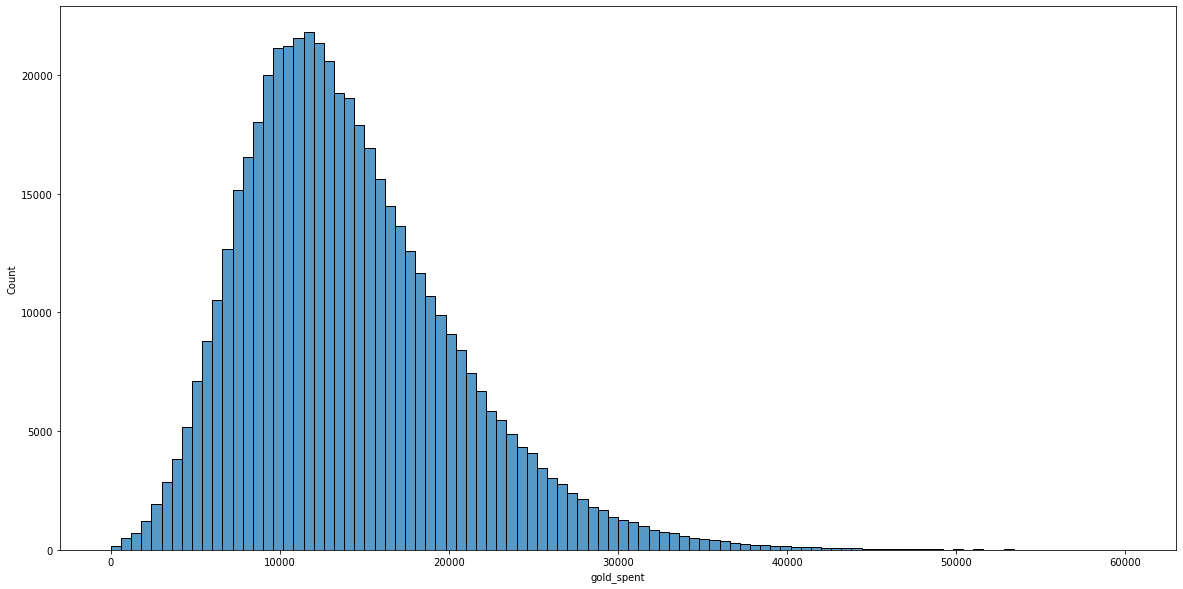

In [8]:
fig = plt.figure(figsize = (20, 10))
sns.histplot(x = "gold_spent", data = merged, bins = 100, binrange = (0, 60000))

<h4>Количество игроков c разным статусом подключения</h4>
<p><i>0 - не покидал матч, 1 - отключался, 2 - отключился на слишком длительное время и покинул игру, 3 - покинул игру, 4 - афк</i></p>

<AxesSubplot:xlabel='leaver_status', ylabel='count'>

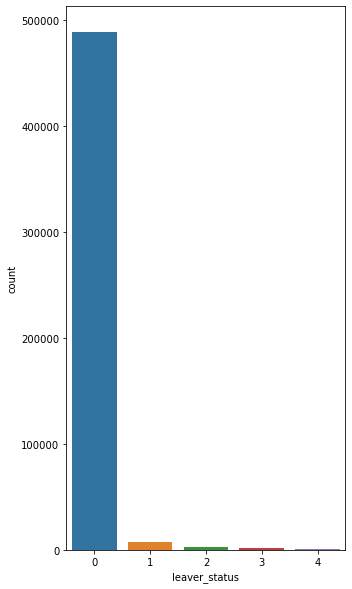

In [9]:
fig = plt.figure(figsize = (5, 10))
sns.countplot(x = "leaver_status", data = merged)

<h4>Частота выбора героев</h4>

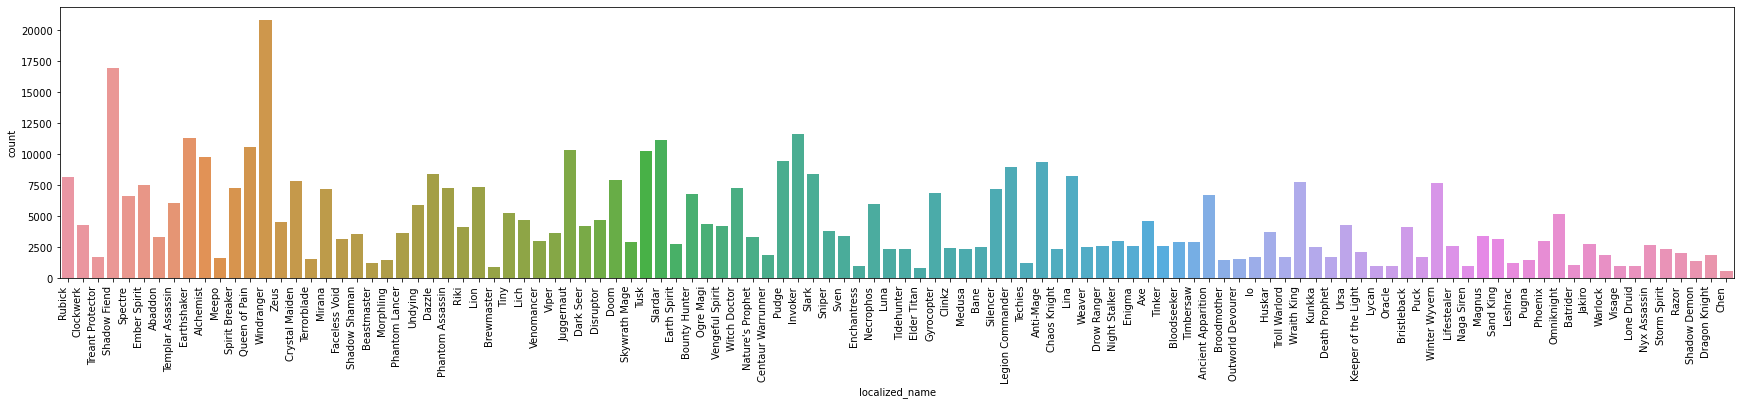

In [10]:
fig = plt.figure(figsize = (30, 5))
gr = sns.countplot(x = "localized_name", data = merged)
gr.set_xticklabels(gr.get_xticklabels(), rotation = 90, ha = "right")
plt.show()

<h4>Распределение золота в минуту</h4>

<AxesSubplot:xlabel='gold_per_min', ylabel='Count'>

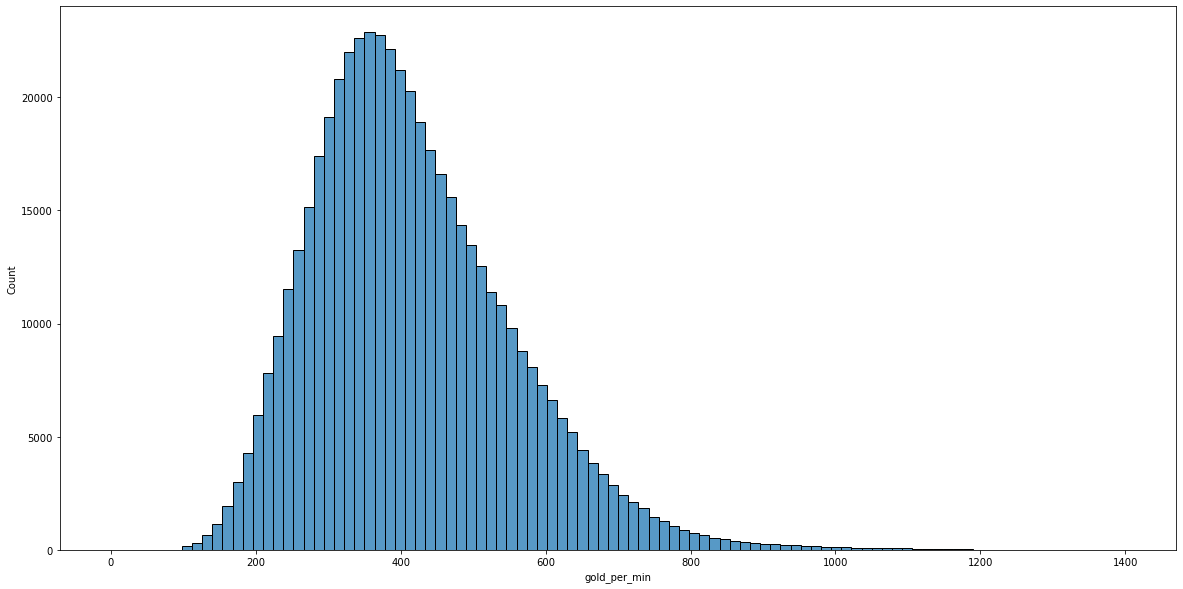

In [11]:
fig = plt.figure(figsize = (20,10))
sns.histplot(x = "gold_per_min", data = merged, bins = 100, binrange = (0, 1400))

<h4>График распределения игроков по командам и слотам в команде</h4>

<AxesSubplot:xlabel='player_slot', ylabel='count'>

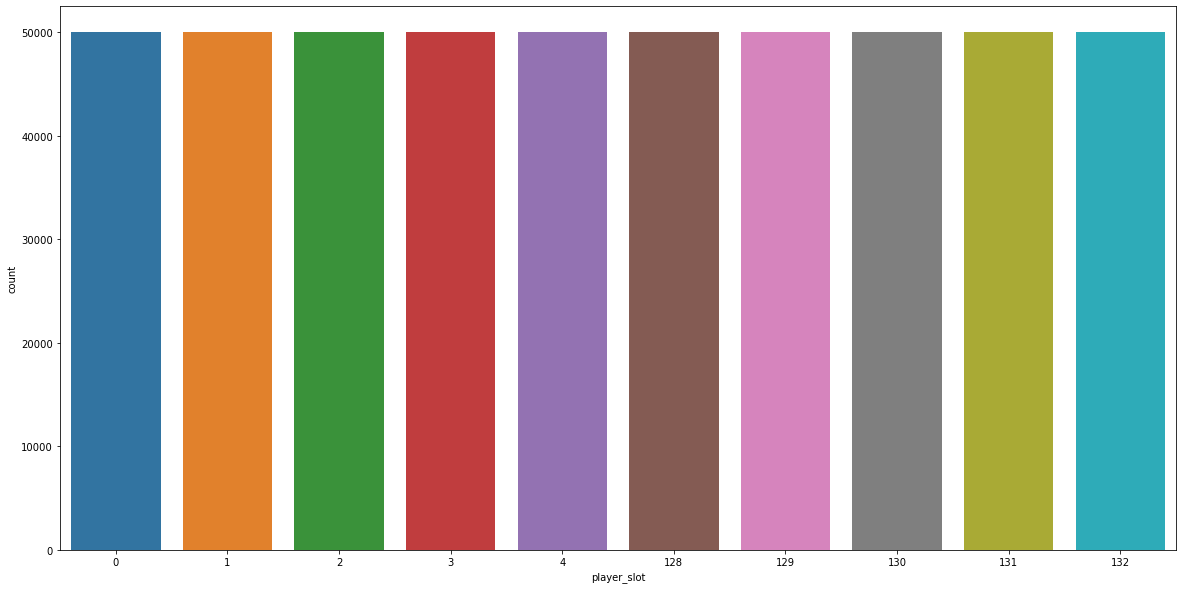

In [12]:
fig = plt.figure(figsize = (20,10))
sns.countplot(x = "player_slot", data = merged)

<h4>Распределение времени стана</h4>

<AxesSubplot:xlabel='stuns', ylabel='Count'>

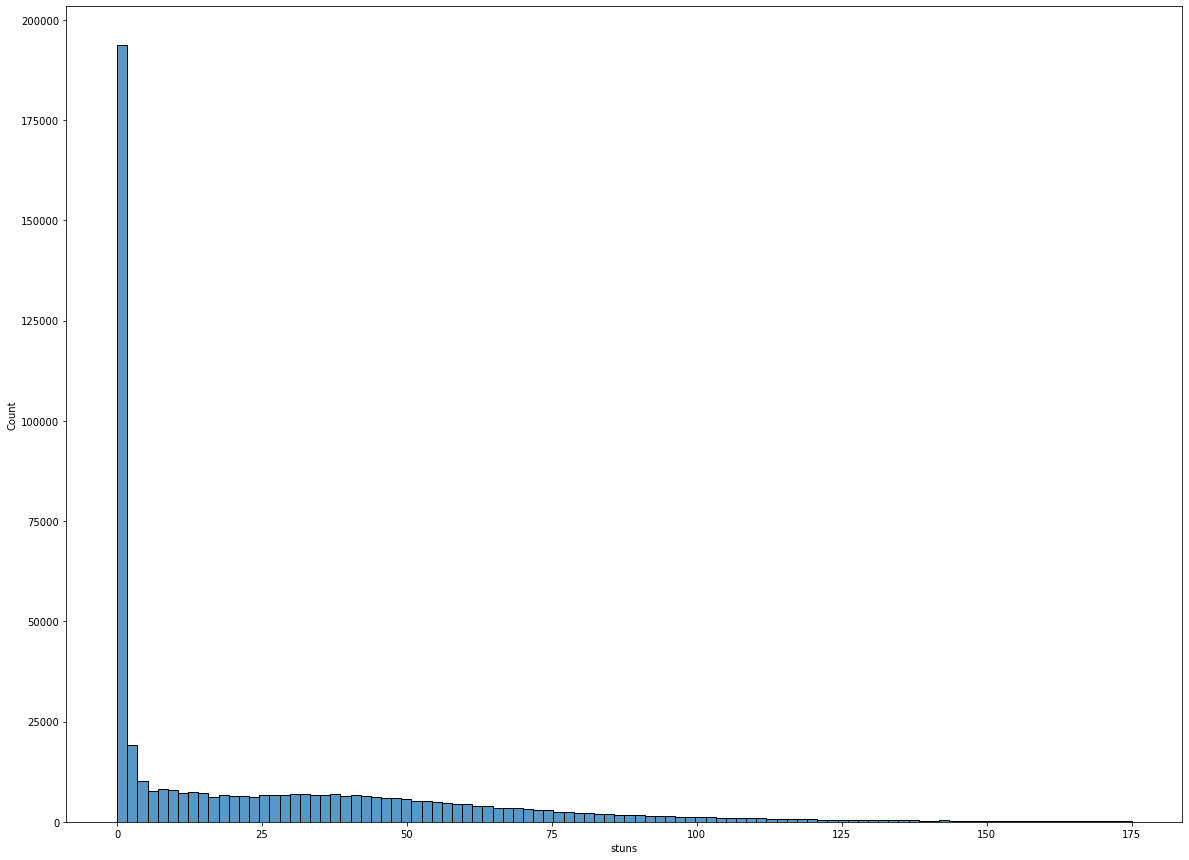

In [13]:
# Заменим для атрибута stuns все вхождения None на 0
# Это возможно, так как отсутствие стана равносильно длительности стана в 0 секунд
merged["stuns"].replace({"None" : "0"}, inplace = True)
# Приведем атрибут к числовому типу данных, чтобы построить график
merged.stuns = merged.stuns.astype(float)

fig = plt.figure(figsize = (20,15))
sns.histplot(x = "stuns", data = merged, bins = 100, binrange = (0, 175))

<h2>Группировка</h2>

<h4>Средний и максимальный GPM по героям</h4>

In [14]:
group_h_gpm = merged.groupby("localized_name")
for localized_name, g in group_h_gpm:
    print("| Hero: {0:30}| mean gpm: {1:5.5f} {2:10}| top gpm: {3:5.2f}"
          .format(localized_name, g["gold_per_min"].mean(), "", g["gold_per_min"].max()))

| Hero: Abaddon                       | mean gpm: 363.05529           | top gpm: 790.00
| Hero: Alchemist                     | mean gpm: 709.54545           | top gpm: 1601.00
| Hero: Ancient Apparition            | mean gpm: 313.14705           | top gpm: 1064.00
| Hero: Anti-Mage                     | mean gpm: 554.19274           | top gpm: 1164.00
| Hero: Axe                           | mean gpm: 400.10911           | top gpm: 831.00
| Hero: Bane                          | mean gpm: 295.29338           | top gpm: 578.00
| Hero: Batrider                      | mean gpm: 362.85674           | top gpm: 731.00
| Hero: Beastmaster                   | mean gpm: 384.13481           | top gpm: 689.00
| Hero: Bloodseeker                   | mean gpm: 447.64175           | top gpm: 1019.00
| Hero: Bounty Hunter                 | mean gpm: 412.04961           | top gpm: 914.00
| Hero: Brewmaster                    | mean gpm: 398.55961           | top gpm: 734.00
| Hero: Bristleback         

<h4>Время стана в зависимости от героя</h4>
<p><i>Эти данные показывают, на каких героях, например, отсутствуют станящие способности, и используются предметы для стана</i></p>

In [15]:
group_h_stuns = merged.groupby("localized_name")
for localized_name, g in group_h_stuns:
    print("| Hero: {0:30}| mean stun time: {1:20} {2:10}| top stun time: {3:5.2f}"
          .format(localized_name, str(g["stuns"].mean()), "", g["stuns"].max()))

| Hero: Abaddon                       | mean stun time: 1.3031869575626578             | top stun time: 50.40
| Hero: Alchemist                     | mean stun time: 39.06189685701918              | top stun time: 272.16
| Hero: Ancient Apparition            | mean stun time: 13.69664334063384              | top stun time: 110.38
| Hero: Anti-Mage                     | mean stun time: 4.774384330776529              | top stun time: 78.75
| Hero: Axe                           | mean stun time: 0.1719751524956313             | top stun time: 32.66
| Hero: Bane                          | mean stun time: 96.94718406188788              | top stun time: 302.66
| Hero: Batrider                      | mean stun time: 40.85690123529409              | top stun time: 139.04
| Hero: Beastmaster                   | mean stun time: 31.312788620142737             | top stun time: 83.50
| Hero: Bloodseeker                   | mean stun time: 1.2394499205199776             | top stun time: 47.76
| Hero

<h4>Средний и максимальный урон по строениям в зависимости от героя</h4>

In [16]:
group_h_td = merged.groupby("localized_name")
for localized_name, g in group_h_td:
    print("| Hero: {0:30}| mean tower damage: {1:20} {2:10}| top tower damage: {3:5.2f}"
          .format(localized_name, str(g["tower_damage"].mean()), "", g["tower_damage"].max()))

| Hero: Abaddon                       | mean tower damage: 1009.6069486404834             | top tower damage: 9151.00
| Hero: Alchemist                     | mean tower damage: 2585.1727578132954             | top tower damage: 13363.00
| Hero: Ancient Apparition            | mean tower damage: 298.4532800236932              | top tower damage: 4139.00
| Hero: Anti-Mage                     | mean tower damage: 3081.401766709238              | top tower damage: 14599.00
| Hero: Axe                           | mean tower damage: 453.6166050858509              | top tower damage: 4397.00
| Hero: Bane                          | mean tower damage: 381.01880141010577             | top tower damage: 5129.00
| Hero: Batrider                      | mean tower damage: 268.39373814041744             | top tower damage: 2246.00
| Hero: Beastmaster                   | mean tower damage: 1491.4956383822364             | top tower damage: 8149.00
| Hero: Bloodseeker                   | mean tower dam

<h4>График размаха по группам для урона по строениям</h4>

<AxesSubplot:xlabel='tower_damage', ylabel='localized_name'>

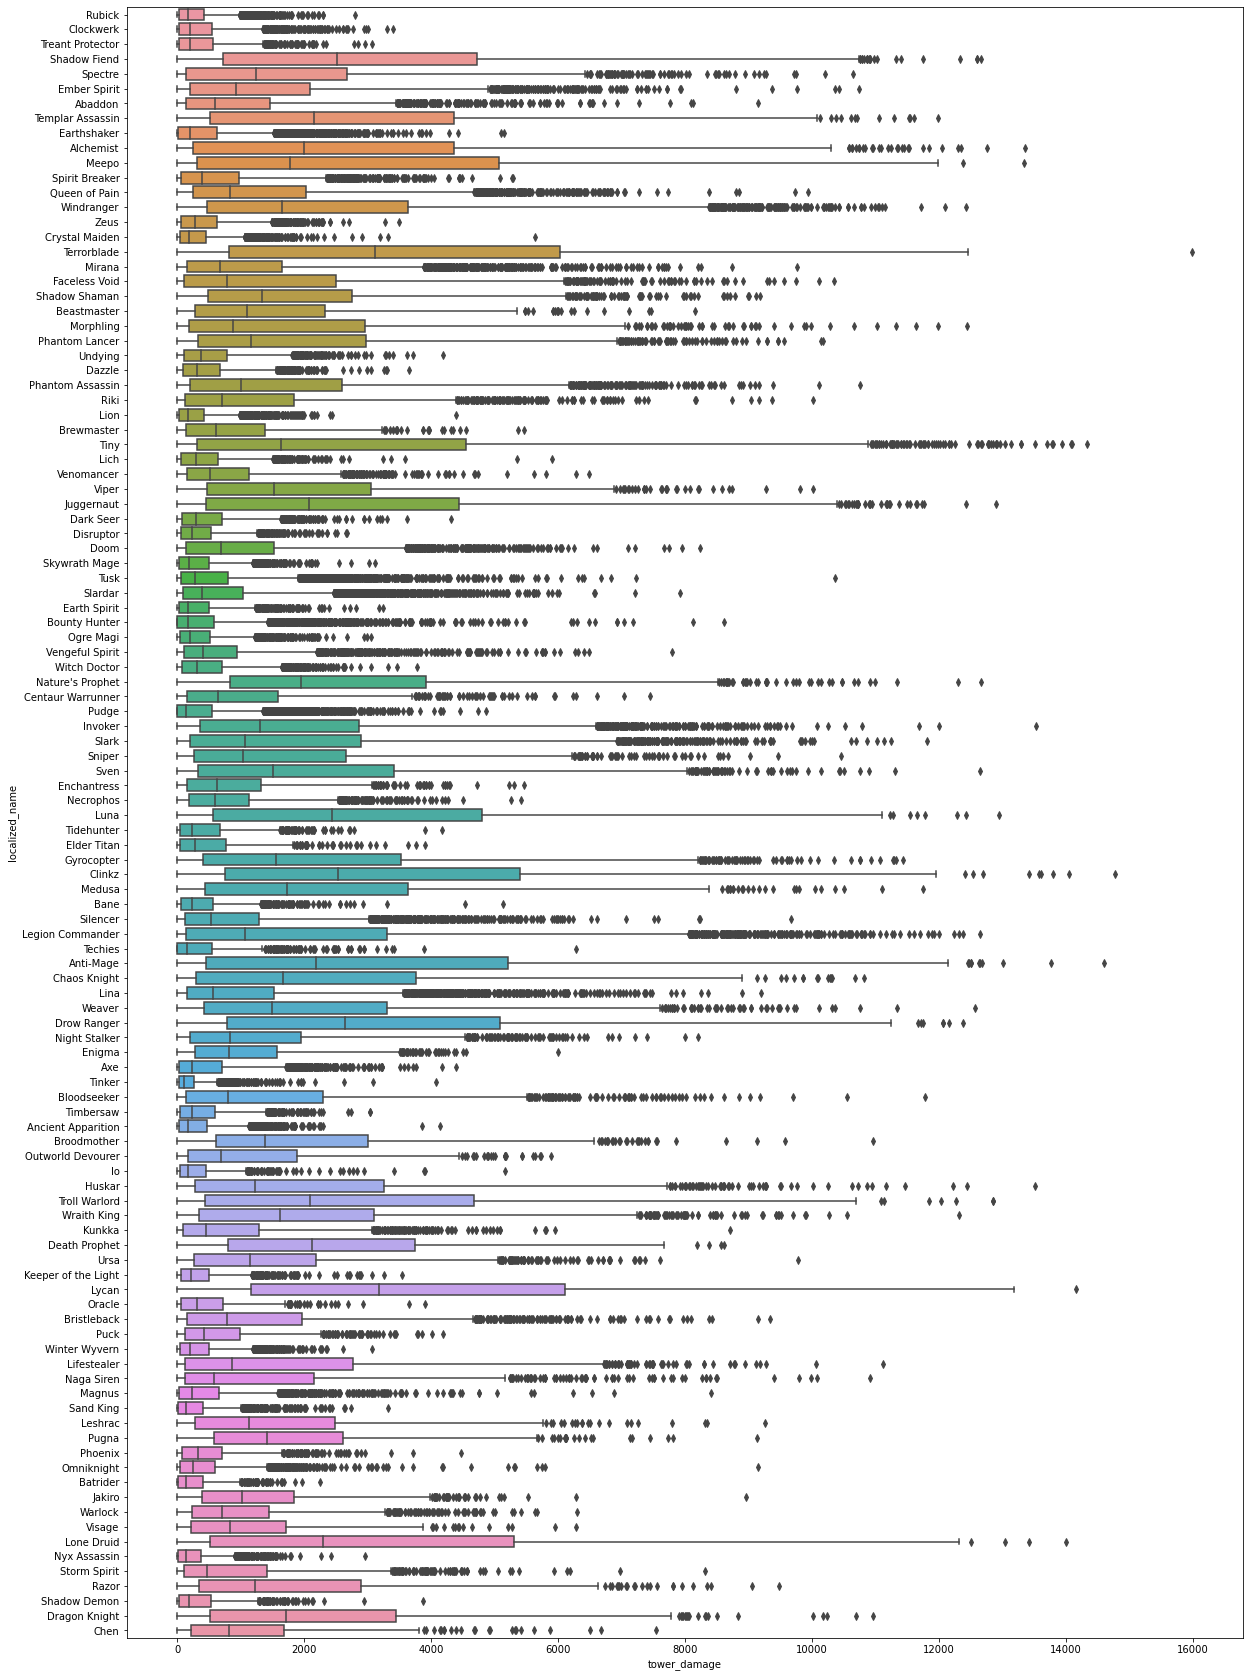

In [17]:
fig = plt.figure(figsize = (20,30))
sns.boxplot(x = "tower_damage", y = "localized_name", data = merged)

<h2>Визуализация зависимостей</h2>

<h4>График соотношения количества убийств в зависимости от героя</h4>

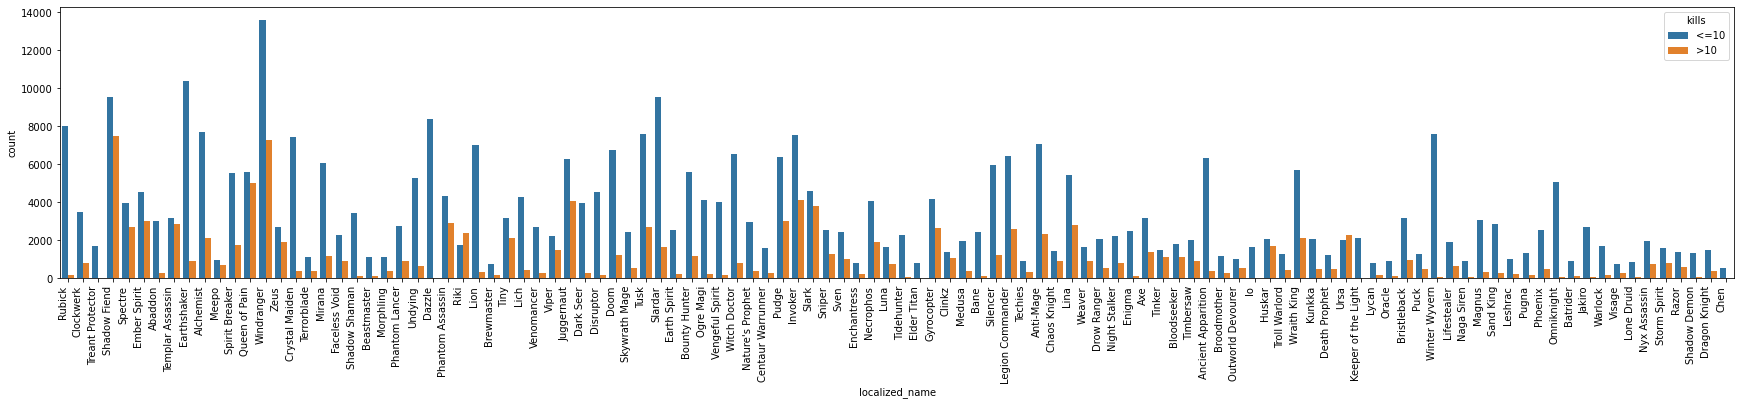

In [21]:
fig = plt.figure(figsize = (30, 5))
# Сделаем копию датафрейма для этой визуализации
# Таким образом мы можем разделить все значения убийств на нужные нам интервалы <=10 и >10
gr_kills = merged.copy()
gr_kills.kills = gr_kills.kills.astype(int)
gr_kills.loc[gr_kills["kills"] <= 10, "kills"] = 0
gr_kills.loc[gr_kills["kills"] > 10, "kills"] = 1
gr = sns.countplot(x = "localized_name", hue = "kills", data = gr_kills)

gr.set_xticklabels(gr.get_xticklabels(), rotation = 90, ha = "right")
legend_labels, _= gr.get_legend_handles_labels()
gr.legend(legend_labels, ["<=10", ">10"], bbox_to_anchor = (1,1), title = "kills")
plt.show()

<h4>График соотношения количества смертей в зависимости от количества убийств</h4>

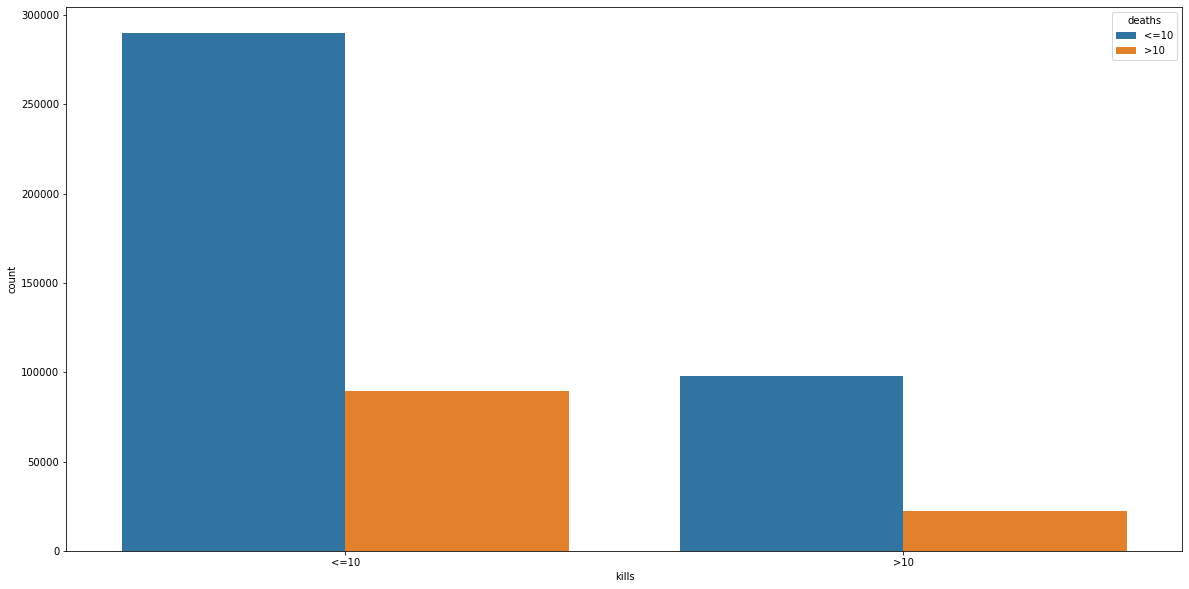

In [32]:
fig = plt.figure(figsize = (20, 10))

# Аналогично прошлому графику но с двумя атрибутами
gr_kd = merged.copy()
gr_kd.deaths = gr_kd.deaths.astype(int)
gr_kd.loc[gr_kd["deaths"] <= 10, "deaths"] = 0
gr_kd.loc[gr_kd["deaths"] > 10, "deaths"] = 1
gr_kd.kills = gr_kd.kills.astype(int)
gr_kd.loc[gr_kd["kills"] <= 10, "kills"] = 0
gr_kd.loc[gr_kd["kills"] > 10, "kills"] = 1
gr_kd.kills = gr_kd.kills.astype(str)
gr_kd.loc[gr_kd["kills"] == "0", "kills"] = "<=10"
gr_kd.loc[gr_kd["kills"] == "1", "kills"] = ">10"
gr = sns.countplot(x = "kills", hue = "deaths", data = gr_kd)
legend_labels, _= gr.get_legend_handles_labels()
gr.legend(legend_labels, ["<=10", ">10"], bbox_to_anchor = (1,1), title = "deaths")
plt.show()

<h4>График соотношения статусов отключения от игры относительно героев</h4>

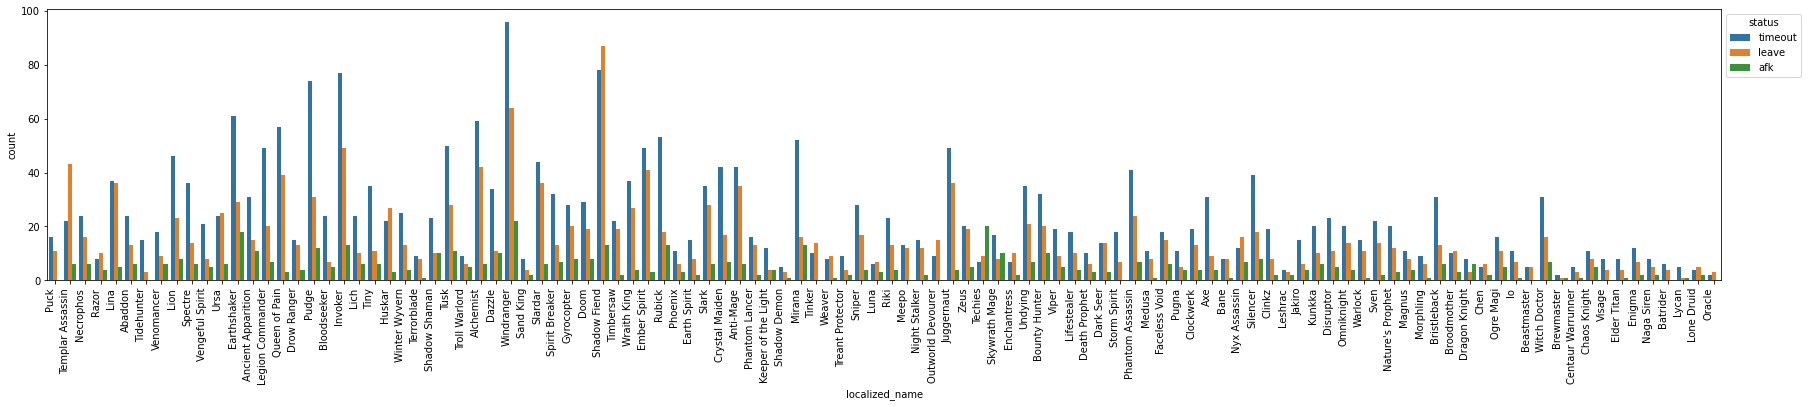

In [38]:
fig = plt.figure(figsize = (30, 5))

gr_h_leaver = merged.copy()
gr = sns.countplot(x = "localized_name", hue = "leaver_status", data = gr_h_leaver.loc[~gr_h_leaver["leaver_status"].isin([0,1])])
legend_labels, _= gr.get_legend_handles_labels()
gr.legend(legend_labels, ["timeout", "leave", "afk"], bbox_to_anchor = (1,1), title = "status")
gr.set_xticklabels(gr.get_xticklabels(), rotation = 90, ha = "right")
plt.show()